# Central Limit Theorem

Small notebook showing the central limit theorem in action.

Remember that given $X_1, X_2, X_3, \ldots$ i.i.d. random variables, with a known and finite expectation $\mu$ and standard deviation $\sigma > 0$, the central limit theorem states that the distribution of the normalized sum
$$Z_n = \frac{X_1 + X_2 + \ldots + X_n - n\mu}{\sigma \sqrt{n}} = \frac{\sum_{i=1}^n (X_i - \mu)}{\sigma \sqrt{n}}$$
converges against the normal distribution $\cal{N}(0,1)$, meaning that
$$\lim_{n\rightarrow\infty} P(Z_n \leq z) = \Phi(z)$$

With $\overline{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n}$ we can also write this as
$$\lim_{n\rightarrow\infty} P\left(\frac{\overline{X}_n - \mu}{\sigma/\sqrt{n}} \leq z\right) = \Phi(z)$$

In [1]:
import numpy as np
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family = 'serif')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson, beta

## reminder: std normal distribution

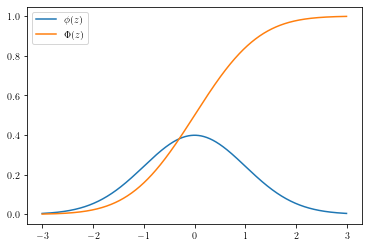

In [2]:
x_norm = np.arange(-3, 3, 0.01)
plt.plot(x_norm, norm.pdf(x_norm,0,1), label=r'$\phi(z)$')
plt.plot(x_norm, norm.cdf(x_norm,0,1), label=r'$\Phi(z)$')
plt.legend()
plt.show()

## helpers

In [3]:
def show_clt(X, mu, sigma):
    m, n = X.shape
    means = X.mean(axis=1)
    Z = (means - mu)/(sigma/n**.5)

    bins = min(25, len(np.unique(means)))
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.title(f'means for {m} samples of size {n}')
    plt.hist(means, bins=bins)

    plt.subplot(1,3,2)
    plt.title('pdf')
    plt.hist(Z, bins=bins, density=True)
    plt.plot(x_norm, norm.pdf(x_norm,0,1), label=r'$\phi(z)$')

    plt.subplot(1,3,3)
    plt.title('cdf')
    plt.hist(Z, bins=250, density=True, cumulative=True)
    plt.plot(x_norm, norm.cdf(x_norm,0,1), label=r'$\Phi(z)$')
    #plt.show()


def vdud(X, k):
    # visualize discrete uniform distribs
    plt.title(f'distrib of {m*n} values')
    plt.hist(X.flatten(), bins=k, range=(1,k+1), rwidth=.9, align='left', density=True)
    plt.xticks(range(1, k+1))
    plt.axhline(1/k, linestyle=':', color='red')
    plt.show()


## discrete uniform distributions

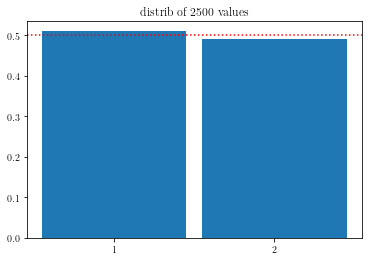

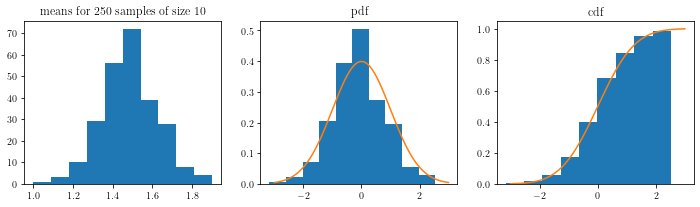

In [4]:
# discrete uniform distribution (coin flip)
k = 2
mu = 1.5
sigma = .5

# draw m samples of size n each
m = 250
n = 10
np.random.seed(42)
X = np.random.randint(1,k+1, (m, n))

vdud(X, k)
show_clt(X, mu, sigma)

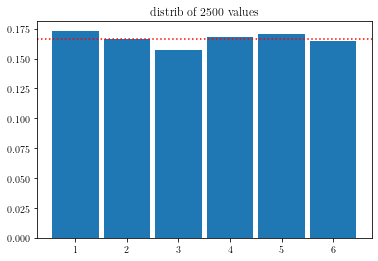

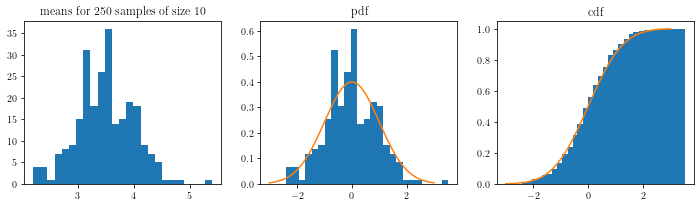

In [5]:
# uniform distribution (6 sided die)
k = 6
mu = 3.5
sigma = (2*(2.5**2 + 1.5**2 + .5**2)/6)**.5

# draw m samples of size n each
np.random.seed(42)
X = np.random.randint(1,k+1, (m, n))

vdud(X, k)
show_clt(X, mu, sigma)

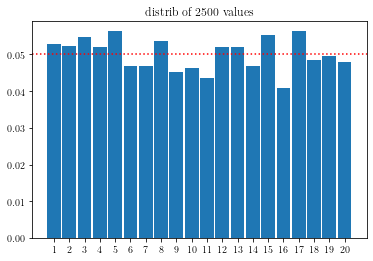

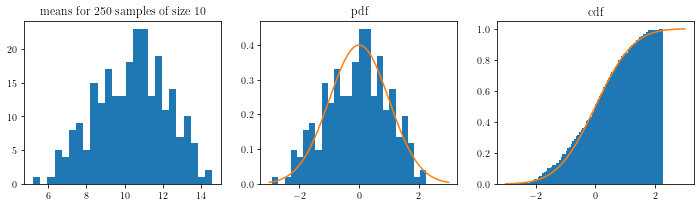

In [6]:
# uniform distribution (k sided die)
k = 20
mu = (k+1)/2
sigma = ((k**2 - 1)/12)**.5

# draw m samples of size n each
np.random.seed(42)
X = np.random.randint(1,k+1, (m, n))

vdud(X, k)
show_clt(X, mu, sigma)

## poisson distribution

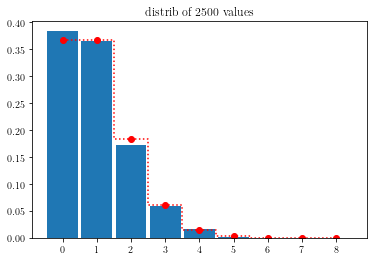

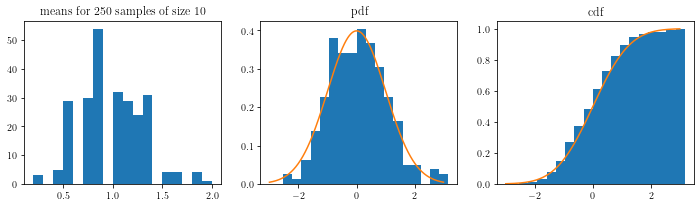

In [7]:
# poisson distribution
lam = 1
mu = lam
sigma = lam
np.random.seed(42)
X = np.random.poisson(lam=lam, size=(m,n))

plt.title(f'distrib of {m*n} values')
ticks = range(0, 8+1)
plt.hist(X.flatten(), bins=9, range=(0, 8+1), rwidth=.9, align='left', density=True)
plt.xticks(ticks)
plt.step(ticks, poisson.pmf(ticks, mu=lam), 'ro:', where='mid')
plt.show()

show_clt(X, mu, sigma)

## normal distribution

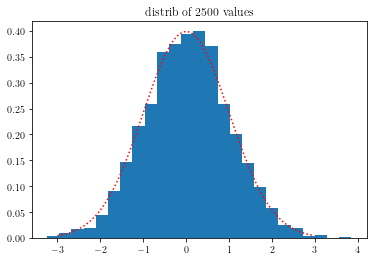

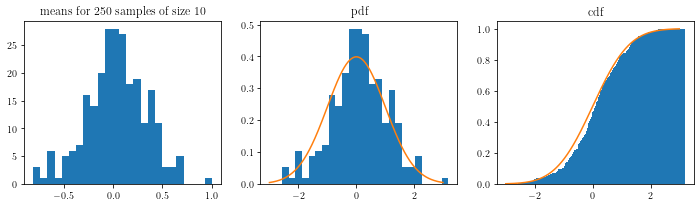

In [8]:
# normal distribution
mu = 0
sigma = 1
np.random.seed(42)
X = np.random.normal(loc=mu, scale=sigma, size=(m,n))

plt.title(f'distrib of {m*n} values')
plt.hist(X.flatten(), bins=25, density=True)
plt.plot(x_norm, norm.pdf(x_norm,0,1), 'r:')
plt.show()

show_clt(X, mu, sigma)

## beta distribution

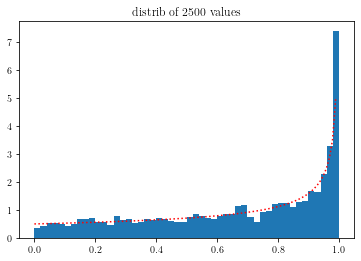

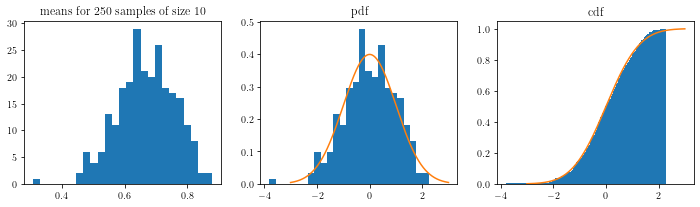

In [9]:
a, b = 1, .5
mu, var = beta.stats(a, b, moments='mv')
sigma = var**.5

X = beta.rvs(a, b, size=(m, n), random_state=42)

plt.title(f'distrib of {m*n} values')
plt.hist(X.flatten(), bins=50, range=(0, 1), density=True)
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, beta.pdf(x_beta, a, b), 'r:')
plt.show()

show_clt(X, mu, sigma)

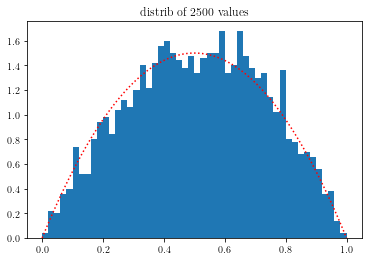

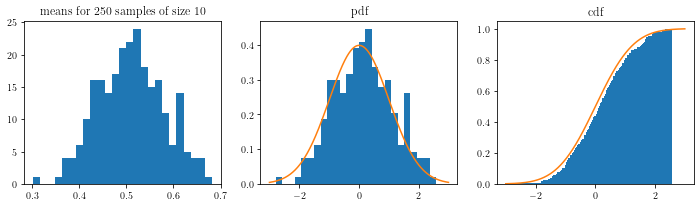

In [10]:
a, b = 2, 2
mu, var = beta.stats(a, b, moments='mv')
sigma = var**.5

X = beta.rvs(a, b, size=(m, n), random_state=42)

plt.title(f'distrib of {m*n} values')
plt.hist(X.flatten(), bins=50, range=(0, 1), density=True)
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, beta.pdf(x_beta, a, b), 'r:')
plt.show()

show_clt(X, mu, sigma)

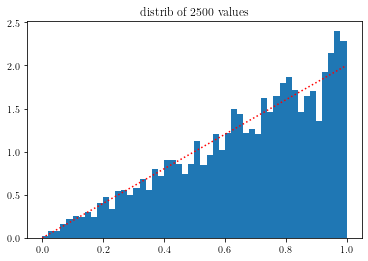

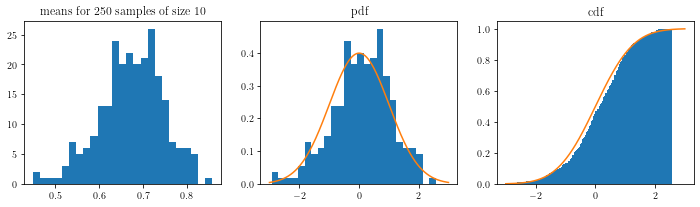

In [11]:
a, b = 2, 1
mu, var = beta.stats(a, b, moments='mv')
sigma = var**.5

X = beta.rvs(a, b, size=(m, n), random_state=42)

plt.title(f'distrib of {m*n} values')
plt.hist(X.flatten(), bins=50, range=(0, 1), density=True)
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, beta.pdf(x_beta, a, b), 'r:')
plt.show()

show_clt(X, mu, sigma)

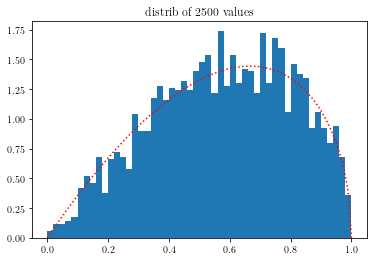

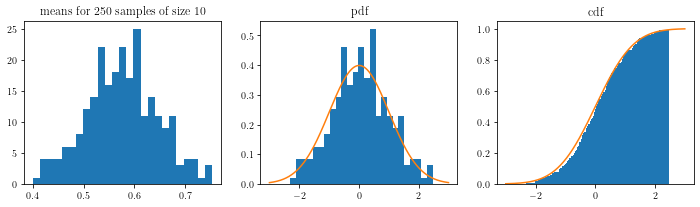

In [12]:
a, b = 2, 1.5
mu, var = beta.stats(a, b, moments='mv')
sigma = var**.5

X = beta.rvs(a, b, size=(m, n), random_state=42)

plt.title(f'distrib of {m*n} values')
plt.hist(X.flatten(), bins=50, range=(0, 1), density=True)
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, beta.pdf(x_beta, a, b), 'r:')
plt.show()

show_clt(X, mu, sigma)

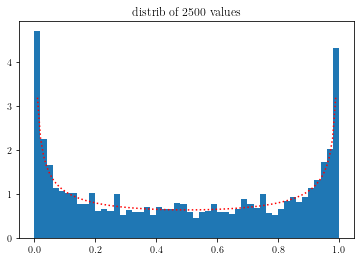

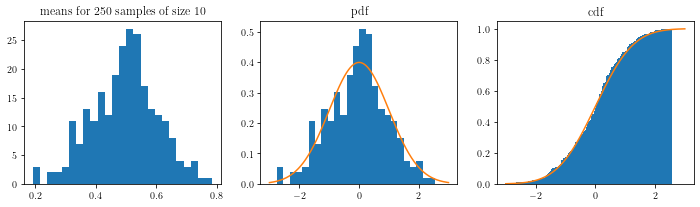

In [13]:
a, b = .5, .5
mu, var = beta.stats(a, b, moments='mv')
sigma = var**.5

X = beta.rvs(a, b, size=(m, n), random_state=42)

plt.title(f'distrib of {m*n} values')
plt.hist(X.flatten(), bins=50, range=(0, 1), density=True)
x_beta = np.linspace(0, 1, 100)
plt.plot(x_beta, beta.pdf(x_beta, a, b), 'r:')
plt.show()

show_clt(X, mu, sigma)